In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dataset = pd.read_csv('titanic_train.csv')
test_dataset = pd.read_csv('titanic_test.csv')
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


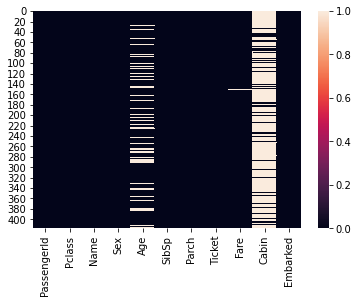

In [ ]:
sns.heatmap(test_dataset.isnull())

In [ ]:
#Median Values - Age ~ Pclass

dataset[["Pclass", "Age"]].groupby(['Pclass'], as_index = False).median().sort_values(by = 'Age',ascending=False)

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [ ]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]

  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    elif Pclass == 3:
      return 24
  else:
    return Age

In [ ]:
dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1)

In [ ]:
dataset.drop('Cabin',axis=1,inplace=True)

In [ ]:
common_value = 'S'
dataset['Embarked'] = dataset['Embarked'].fillna(common_value)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)


In [ ]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [ ]:
dataset.shape

(891, 9)

In [ ]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset.drop('Survived',axis=1), 
                                                    dataset['Survived'], test_size=0.20, 
                                                    random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)
predictions = logmodel.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Filling missing values

test_dataset['Age'] = dataset[['Age','Pclass']].apply(impute_age,axis=1) #Imputing Age Column
test_dataset['Fare'].fillna(method = 'ffill',inplace = True) #Imputing Fare column

In [ ]:
#Categorical data encoding

gender_test = pd.get_dummies(test_dataset['Sex'],drop_first=True)
embark_test = pd.get_dummies(test_dataset['Embarked'],drop_first=True)

In [ ]:
PassengerId = test_dataset['PassengerId']

In [ ]:
#Concatenating encoded columns 'Sex' and 'Embarked' to the test dataset

test_dataset = pd.concat([test_dataset,gender_test,embark_test],axis = 1)

In [ ]:
#Dropping redundant columns

test_dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket','Cabin'],axis = 1,inplace=True)

In [ ]:
test_dataset.shape

(418, 8)

In [ ]:
test_dataset.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,0,0,7.8292,1,1,0
1,3,38.0,1,0,7.0000,0,0,1
2,2,26.0,0,0,9.6875,1,1,0
3,3,35.0,0,0,8.6625,1,0,1
4,3,35.0,1,1,12.2875,0,0,1


In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   male    418 non-null    uint8  
 6   Q       418 non-null    uint8  
 7   S       418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.7 KB


In [ ]:
y_pred_test = logmodel.predict(test_dataset)
y_pred_test[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
submission = pd.DataFrame({
        "PassengerId": PassengerId,
        "Survived": y_pred_test
    })
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
submission.to_csv('submission.csv', index=False)

Confusion Matrix

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Accuracy Score :',accuracy_score(y_test,predictions))
print('Confusion Matrix :')
print(confusion_matrix(y_test,predictions))
print('Classification Report :')
print(classification_report(y_test,predictions))

Accuracy Score : 0.8100558659217877
Confusion Matrix :
[[88 11]
 [23 57]]
Classification Report :
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        99
           1       0.84      0.71      0.77        80

    accuracy                           0.81       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color='orange', label='ROC')
  plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend()
  plt.show()

In [ ]:
probs = logmodel.predict_proba(x_test)
probs[:5]

array([[0.66814645, 0.33185355],
       [0.03956471, 0.96043529],
       [0.50085598, 0.49914402],
       [0.80254188, 0.19745812],
       [0.77261983, 0.22738017]])

In [ ]:
probs = probs[:, 1] #Probability for survival
probs

array([0.33185355, 0.96043529, 0.49914402, 0.19745812, 0.22738017,
       0.06604391, 0.40111648, 0.12389955, 0.85573671, 0.57857759,
       0.22738017, 0.09096591, 0.65465588, 0.11632762, 0.13141041,
       0.06866932, 0.53909884, 0.14424055, 0.13862386, 0.76999244,
       0.08277069, 0.06518953, 0.64394856, 0.58546864, 0.05639363,
       0.23007709, 0.14879371, 0.22158344, 0.10538412, 0.0684288 ,
       0.78423824, 0.79825829, 0.64395795, 0.10500236, 0.09325736,
       0.94265591, 0.09665894, 0.0619969 , 0.09927566, 0.43040207,
       0.66892817, 0.57857759, 0.87759494, 0.31230758, 0.17849533,
       0.40150989, 0.05921394, 0.33427775, 0.08014439, 0.22738017,
       0.79863688, 0.33087846, 0.74544538, 0.66320096, 0.64395795,
       0.11654098, 0.14414788, 0.14362017, 0.29339388, 0.90609049,
       0.91270427, 0.14223951, 0.04916687, 0.58659802, 0.06812192,
       0.26744989, 0.80233459, 0.55656254, 0.572823  , 0.39791504,
       0.5887772 , 0.13582114, 0.13180955, 0.13551877, 0.54483

In [ ]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' %auc)

AUC: 0.88


In [ ]:
y_test_arr = np.array(y_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

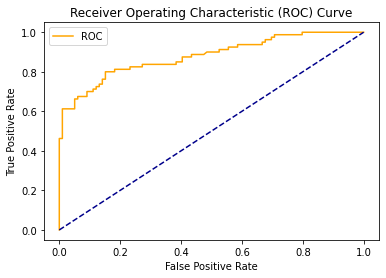

In [ ]:
plot_roc_curve(fpr, tpr)